In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='whitegrid', context='paper')

/Users/olgabot/anaconda3/envs/maca/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
cell_annotations = pd.read_csv('/Users/olgabot/code/maca/metadata/maca_3month_combined_cell_annotations.csv', 
                               index_col=0)
print(cell_annotations.shape)
cell_annotations.head()

(42187, 5)


,annotation,plate.barcode,subannotation,tissue,annotation_subannotation
A21.MAA000594.3_8_M.1.1,fibroblasts,maa,NaN,Aorta,fibroblasts
F8.MAA000594.3_8_M.1.1,erythroblasts_and_adipocytes,maa,NaN,Aorta,erythroblasts_and_adipocytes
H11.MAA000594.3_8_M.1.1,erythroblasts_and_adipocytes,maa,NaN,Aorta,erythroblasts_and_adipocytes
A22.MAA000594.3_8_M.1.1,erythroblasts_and_adipocytes,maa,NaN,Aorta,erythroblasts_and_adipocytes
H12.MAA000594.3_8_M.1.1,adipocytes,maa,NaN,Aorta,adipocytes


In [3]:
figure_folder = '/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures'

figure1_folder = f'{figure_folder}/figure1/plates'
figure2_folder = f'{figure_folder}/figure2/plates'

print(f'figure1_folder: "{figure1_folder}"')
print(f'figure2_folder: "{figure2_folder}"')

! mkdir -p "$figure1_folder"
! mkdir -p "$figure2_folder"

figure1_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/figure1/plates"
figure2_folder: "/Users/olgabot/googledrive/MACA_3mo_manuscript/Main figures/figure2/plates"


In [4]:
folder = '/Users/olgabot/code/maca/metadata/number_of_cells_reads_genes/'

In [5]:
ls $folder

Aorta_cell_numbers.csv                  Lung_cell_numbers.csv
Aorta_nreads_ngenes.csv                 Lung_nreads_ngenes.csv
Bladder_cell_numbers.csv                Mammary_Gland_cell_numbers.csv
Bladder_nreads_ngenes.csv               Mammary_Gland_nreads_ngenes.csv
Brain_FACS_microglia_cell_numbers.csv   Marrow_cell_numbers.csv
Brain_FACS_microglia_nreads_ngenes.csv  Marrow_nreads_ngenes.csv
Brain_FACS_neurons_cell_numbers.csv     Muscle_cell_numbers.csv
Brain_FACS_neurons_nreads_ngenes.csv    Muscle_nreads_ngenes.csv
Colon_cell_numbers.csv                  Pancreas_cell_numbers.csv
Colon_nreads_ngenes.csv                 Pancreas_nreads_ngenes.csv
Diaphragm_cell_numbers.csv              Skin_cell_numbers.csv
Diaphragm_nreads_ngenes.csv             Skin_nreads_ngenes.csv
Fat_cell_numbers.csv                    Spleen_cell_numbers.csv
Fat_nreads_ngenes.csv                   Spleen_nreads_ngenes.csv
Heart_cell_numbers.csv                  Thymus_cell_numbers.csv
Heart_nreads_ngenes.csv

In [6]:
import hermione as hm

In [7]:
! head $folder/Aorta*

==> /Users/olgabot/code/maca/metadata/number_of_cells_reads_genes//Aorta_cell_numbers.csv <==
"","Aorta"
"n_genes",19721
"n_cells_pass_qc",364
"n_cells_sequenced",1113

==> /Users/olgabot/code/maca/metadata/number_of_cells_reads_genes//Aorta_nreads_ngenes.csv <==
"","nGene","nReads","orig.ident"
"A21.MAA000594.3_8_M.1.1",3850,1848089,"Heart"
"F8.MAA000594.3_8_M.1.1",788,55689,"Heart"
"H11.MAA000594.3_8_M.1.1",554,318135,"Heart"
"A22.MAA000594.3_8_M.1.1",1279,270173,"Heart"
"H12.MAA000594.3_8_M.1.1",946,278892,"Heart"
"L9.MAA000594.3_8_M.1.1",798,196845,"Heart"
"P17.MAA000594.3_8_M.1.1",3531,818237,"Heart"
"D6.MAA000594.3_8_M.1.1",584,246067,"Heart"
"F14.MAA000594.3_8_M.1.1",1085,50291,"Heart"


In [8]:
import glob
import os 

globber = f'{folder}/*_nreads_ngenes.csv'

dfs = []

for filename in glob.iglob(globber):
    df = pd.read_csv(filename, index_col=0)
    df['tissue'] = os.path.basename(filename).split('_nreads_ngenes.csv')[0]
    dfs.append(df)
nreads_ngenes = pd.concat(dfs)
print(nreads_ngenes.shape)
print(len(nreads_ngenes.groupby('tissue')))
nreads_ngenes.head()

(43421, 4)
20


,nGene,nReads,orig.ident,tissue
A21.MAA000594.3_8_M.1.1,3850,1848089,Heart,Aorta
F8.MAA000594.3_8_M.1.1,788,55689,Heart,Aorta
H11.MAA000594.3_8_M.1.1,554,318135,Heart,Aorta
A22.MAA000594.3_8_M.1.1,1279,270173,Heart,Aorta
H12.MAA000594.3_8_M.1.1,946,278892,Heart,Aorta


In [9]:
import numpy as np

In [10]:
nreads_ngenes['log10_nReads'] = np.log10(nreads_ngenes['nReads'])

In [11]:
colors = pd.read_csv('/Users/olgabot/code/maca/metadata/tissue_colors.csv', index_col=0, squeeze=True)
colors

Aorta                   #1f77b4
Bladder                 #aec7e8
Brain_FACS_microglia    #ff7f0e
Brain_FACS_neurons      #ffbb78
Colon                   #2ca02c
Diaphragm               #98df8a
Fat                     #d62728
Heart                   #ff9896
Kidney                  #9467bd
Liver                   #c5b0d5
Lung                    #8c564b
Mammary_Gland           #c49c94
Marrow                  #e377c2
Muscle                  #f7b6d2
Pancreas                #7f7f7f
Skin                    #c7c7c7
Spleen                  #bcbd22
Thymus                  #dbdb8d
Tongue                  #17becf
Trachea                 #9edae5
Name: color, dtype: object

In [12]:
tissues = sorted(cell_annotations['tissue'].unique())
tissues

['Aorta',
 'Bladder',
 'Brain_FACS_microglia',
 'Brain_FACS_neurons',
 'Colon',
 'Diaphragm',
 'Fat',
 'Heart',
 'Kidney',
 'Liver',
 'Lung',
 'Mammary_Gland',
 'Marrow',
 'Muscle',
 'Pancreas',
 'Skin',
 'Spleen',
 'Thymus',
 'Tongue',
 'Trachea']

In [13]:
kwargs = dict(data=nreads_ngenes, row='tissue', 
               row_order=tissues, palette=colors, xlabel_suffix='')

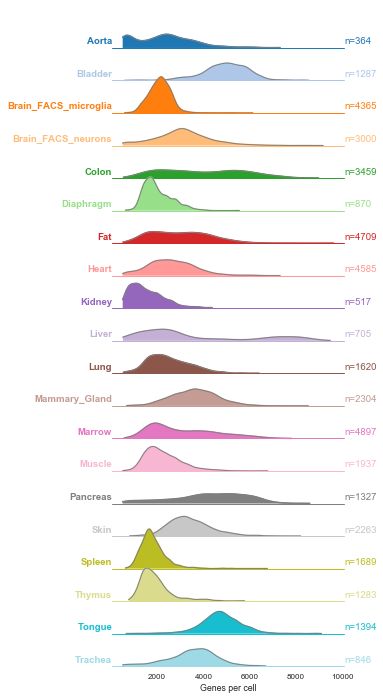

In [14]:
g = hm.horizonplot(x='nGene', **kwargs)
g.set_xlabels('Genes per cell')
g.savefig(f'{figure1_folder}/horizonplot_genes_per_cell.pdf')

In [15]:
# hm.horizonplot(x='nReads', **kwargs)

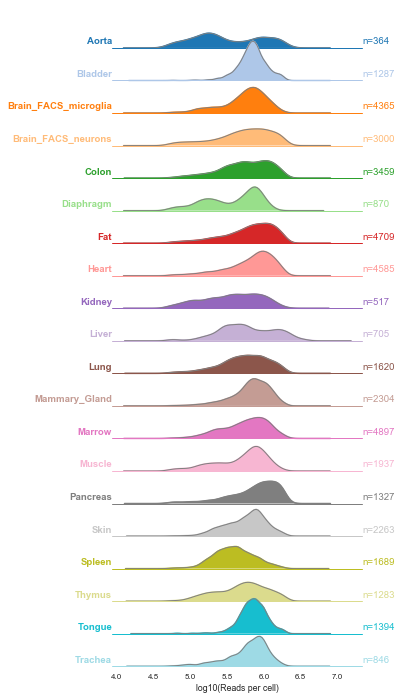

In [16]:
g = hm.horizonplot(x='log10_nReads', **kwargs)
g.set_xlabels('log10(Reads per cell)')
g.savefig(f'{figure1_folder}/horizonplot_log10_reads_per_cell.pdf')

In [17]:
n_cells_per_tissue = nreads_ngenes.groupby('tissue').size().reset_index()
n_cells_per_tissue = n_cells_per_tissue.rename(columns={0: 'n_cells'})
n_cells_per_tissue

,tissue,n_cells
0,Aorta,364
1,Bladder,1287
2,Brain_FACS_microglia,4365
3,Brain_FACS_neurons,3000
4,Colon,3459
5,Diaphragm,870
6,Fat,4709
7,Heart,4585
8,Kidney,517
9,Liver,705


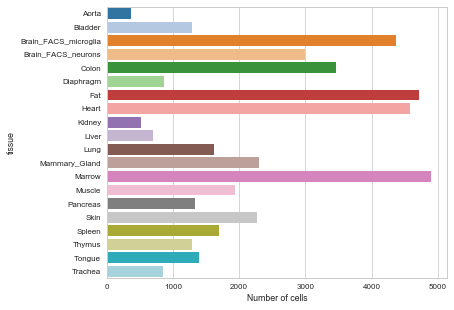

In [18]:
fig, ax = plt.subplots()
sns.barplot(x='n_cells', y='tissue', data=n_cells_per_tissue, palette=colors, order=tissues)
ax.set(xlabel='Number of cells')
fig.tight_layout()
fig.savefig(f'{figure1_folder}/barplot_n_cells_per_tissue.pdf')

In [19]:
n_tissues = len(tissues)
n_tissues

20

In [20]:
from matplotlib.colors import rgb2hex

In [21]:
palette = pd.Series(map(rgb2hex, sns.color_palette('tab20', n_colors=n_tissues)), index=tissues, name='color')
palette

Aorta                   #1f77b4
Bladder                 #aec7e8
Brain_FACS_microglia    #ff7f0e
Brain_FACS_neurons      #ffbb78
Colon                   #2ca02c
Diaphragm               #98df8a
Fat                     #d62728
Heart                   #ff9896
Kidney                  #9467bd
Liver                   #c5b0d5
Lung                    #8c564b
Mammary_Gland           #c49c94
Marrow                  #e377c2
Muscle                  #f7b6d2
Pancreas                #7f7f7f
Skin                    #c7c7c7
Spleen                  #bcbd22
Thymus                  #dbdb8d
Tongue                  #17becf
Trachea                 #9edae5
Name: color, dtype: object

In [22]:
palette.to_csv('/Users/olgabot/code/maca/metadata/tissue_colors.csv', header=True)

In [23]:
! head /Users/olgabot/code/maca/metadata/tissue_colors.csv

,color
Aorta,#1f77b4
Bladder,#aec7e8
Brain_FACS_microglia,#ff7f0e
Brain_FACS_neurons,#ffbb78
Colon,#2ca02c
Diaphragm,#98df8a
Fat,#d62728
Heart,#ff9896
Kidney,#9467bd


In [24]:
pd.Series(tissues)

0                    Aorta
1                  Bladder
2     Brain_FACS_microglia
3       Brain_FACS_neurons
4                    Colon
5                Diaphragm
6                      Fat
7                    Heart
8                   Kidney
9                    Liver
10                    Lung
11           Mammary_Gland
12                  Marrow
13                  Muscle
14                Pancreas
15                    Skin
16                  Spleen
17                  Thymus
18                  Tongue
19                 Trachea
dtype: object

In [25]:
cell_annotations.groupby('tissue').apply(lambda x: len(x.groupby('annotation_subannotation')))

tissue
Aorta                    6
Bladder                  5
Brain_FACS_microglia     2
Brain_FACS_neurons      13
Colon                    8
Diaphragm                5
Fat                     10
Heart                    9
Kidney                   7
Liver                    5
Lung                    16
Mammary_Gland           10
Marrow                  12
Muscle                   8
Pancreas                11
Skin                     6
Spleen                   6
Thymus                   6
Tongue                   7
Trachea                  7
dtype: int64


--- Aorta ---
       annotation_subannotation  n_cells
0                    adipocytes       93
1             endothelial_cells      131
2  erythroblasts_and_adipocytes       51
3                   fibroblasts       35
4           hematopoietic_cells       17
5           smooth_muscle_cells       37
6

--- Bladder ---
  annotation_subannotation  n_cells
0              basal_cells       99
1         luminal_cells: a      436
2         luminal_cells: b       96
3     mesenchymal_cells: a      335
4     mesenchymal_cells: b      321
5

--- Brain_FACS_microglia ---
  annotation_subannotation  n_cells
0              macrophages       36
1                microglia     4329
2

--- Brain_FACS_neurons ---
                    annotation_subannotation  n_cells
0                  astrocytes: bergmann_glia       30
1            astrocytes: cerebral_astrocytes      403
2   astrocytes: myelinating_oligodendrocytes       11
3                endothelial_cells: vascular      625
4                   end

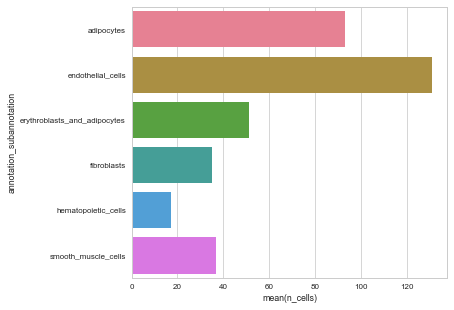

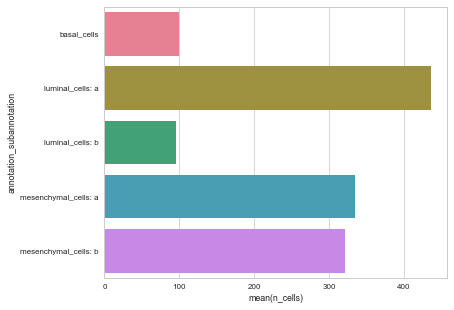

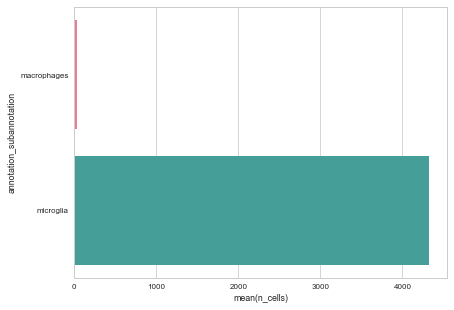

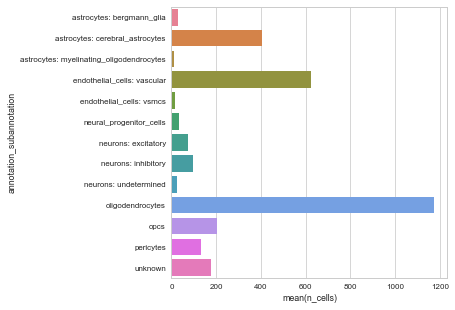

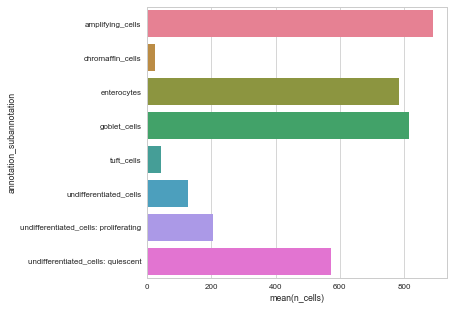

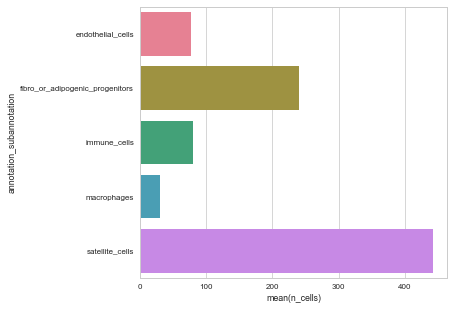

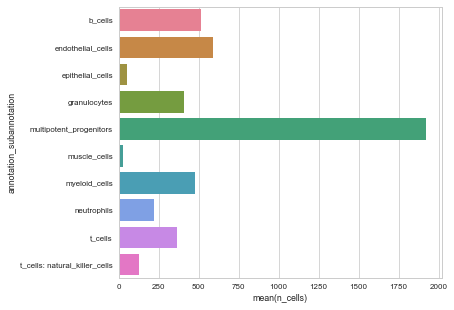

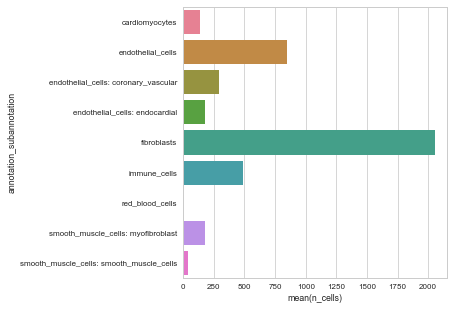

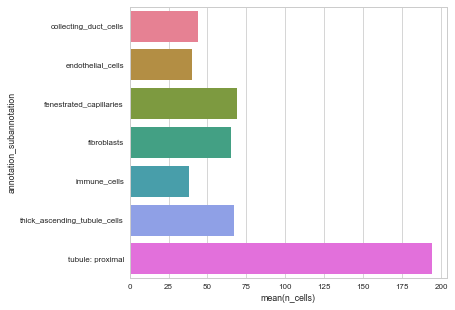

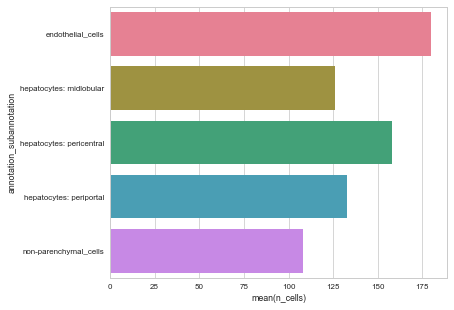

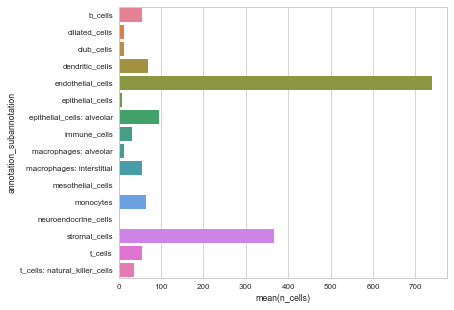

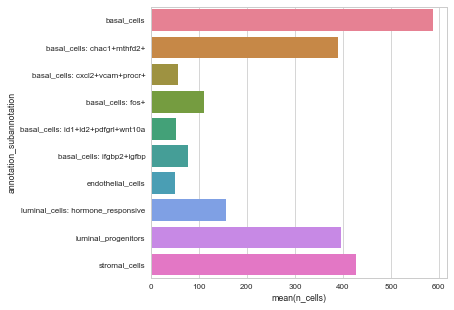

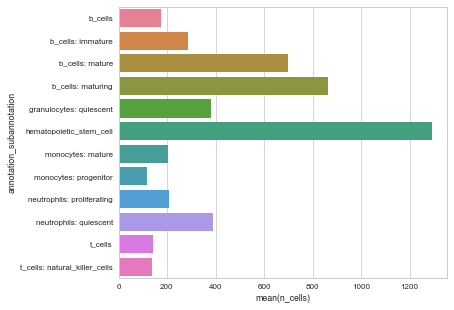

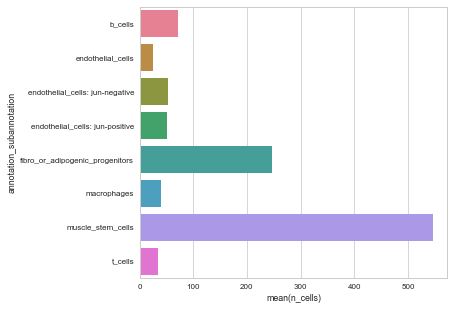

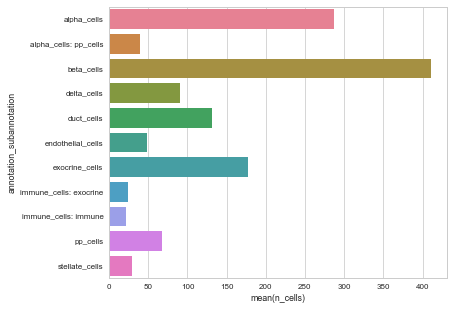

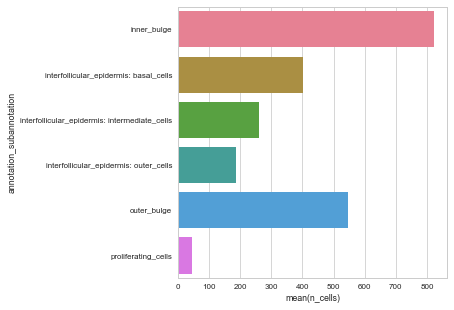

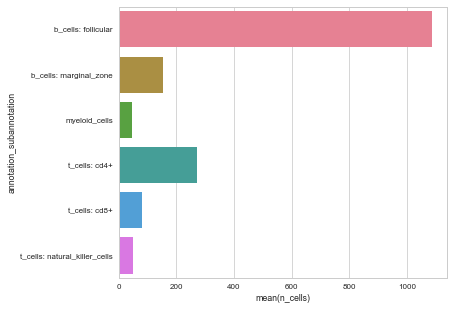

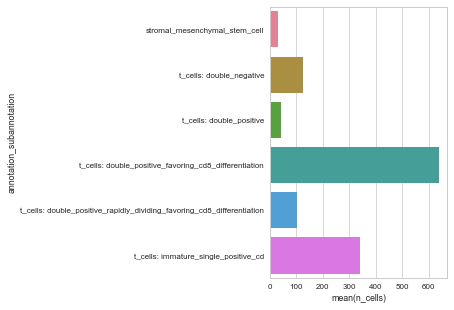

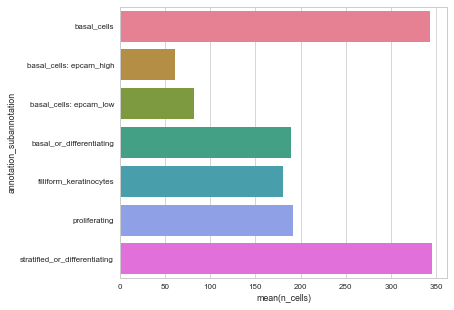

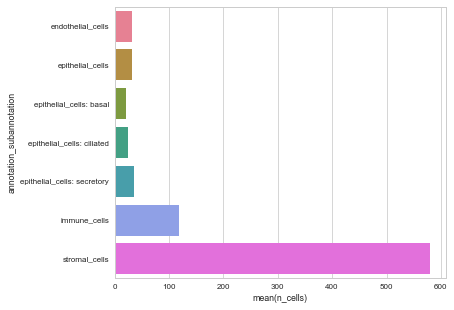

In [26]:
for tissue, df in cell_annotations.groupby('tissue'):
    print(f'\n--- {tissue} ---')
    annotation_subannotation = df.groupby('annotation_subannotation').size().reset_index()
    annotation_subannotation = annotation_subannotation.rename(columns={0: 'n_cells'})
    print(annotation_subannotation)
    print(len(annotation_subannotation))
    
    fig, ax = plt.subplots()
    sns.barplot(x='n_cells', y='annotation_subannotation', data=annotation_subannotation, palette='husl')
    fig.tight_layout()
    fig.savefig(f'{figure2_folder}/barplot_n_cells_per_annotation_{tissue}.pdf')


In [27]:
annotation_subannotation

,annotation_subannotation,n_cells
0,endothelial_cells,33
1,epithelial_cells,33
2,epithelial_cells: basal,21
3,epithelial_cells: ciliated,25
4,epithelial_cells: secretory,36
5,immune_cells,118
6,stromal_cells,580
